In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('D:\Placemennt_analysis_pridiction\college_student_placement_dataset.csv')
data

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\1981457739.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Placemennt_analysis_pridiction\college_student_placement_dataset.csv')


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [10]:
## Data Overview
print("Data Information: ")
data.info()

## checking for null values
print("Null Values: ")
print(data.isnull().sum())

## checking for duplicate values
print("Duplicate Values: ")
data.duplicated().sum()

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
Null Values: 
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experien

np.int64(0)

In [12]:
## Removing dupliicates  if any
data.drop_duplicates(inplace=True)
print(f"Dataset shape after dropping duplicates: {data.shape}")

Dataset shape after dropping duplicates: (10000, 10)


In [13]:
#  Data Transformation
# Convert binary categorical columns ('Yes'/'No') to numerical (1/0)
data['Internship_Experience'] = data['Internship_Experience'].map({'Yes': 1, 'No': 0})
data['Placement'] = data['Placement'].map({'Yes': 1, 'No': 0})

print("\nData after converting 'Yes'/'No' to 1/0:")
display(data.head())


Data after converting 'Yes'/'No' to 1/0:


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [14]:
# Descriptive Statistics
print("Descriptive Statistics of Numerical Features:")
display(data.describe())

Descriptive Statistics of Numerical Features:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\1789420057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Placement', data=data, palette='viridis')


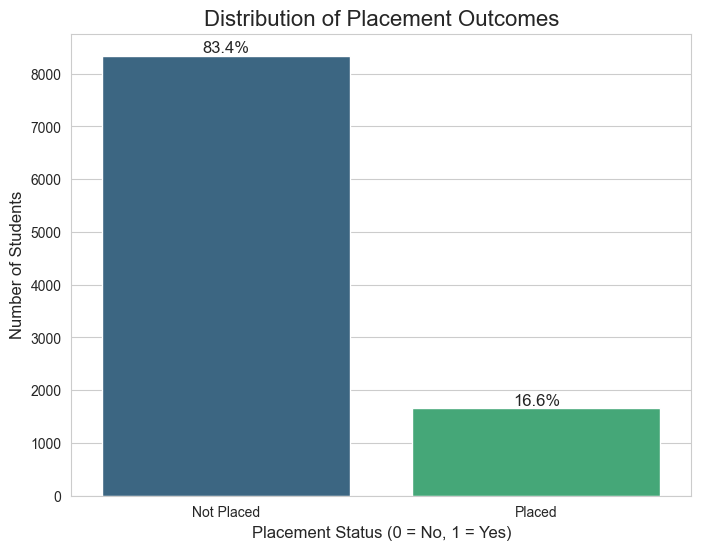

In [15]:
# Analyzing the Placement Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Placement', data=data, palette='viridis')
plt.title('Distribution of Placement Outcomes', fontsize=16)
plt.xlabel('Placement Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks([0, 1], ['Not Placed', 'Placed'])

# Add percentage labels
total = len(data['Placement'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\4199180149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Placement', y='CGPA', data=data, palette='coolwarm')


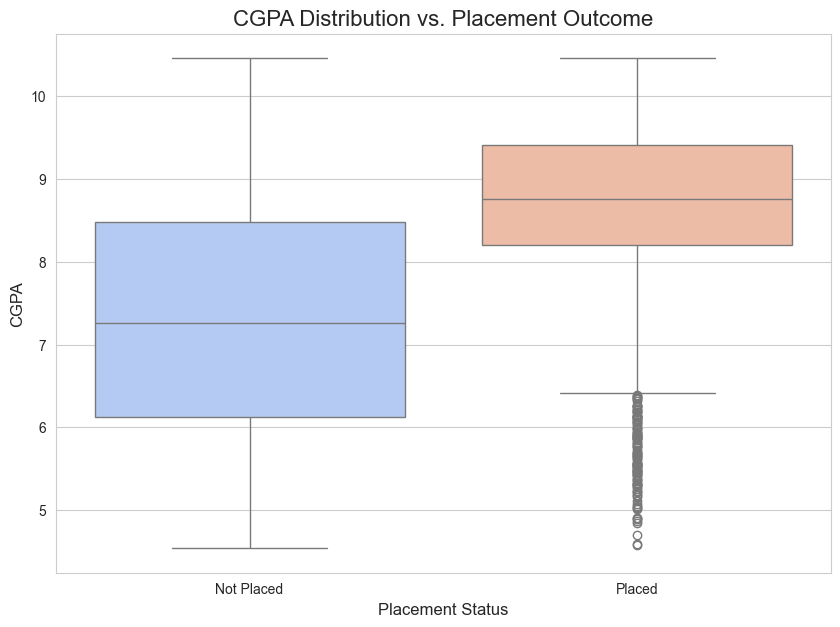

In [17]:
#  CGPA vs. Placement
plt.figure(figsize=(10, 7))
sns.boxplot(x='Placement', y='CGPA', data=data, palette='coolwarm')
plt.title('CGPA Distribution vs. Placement Outcome', fontsize=16)
plt.xlabel('Placement Status', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.show()

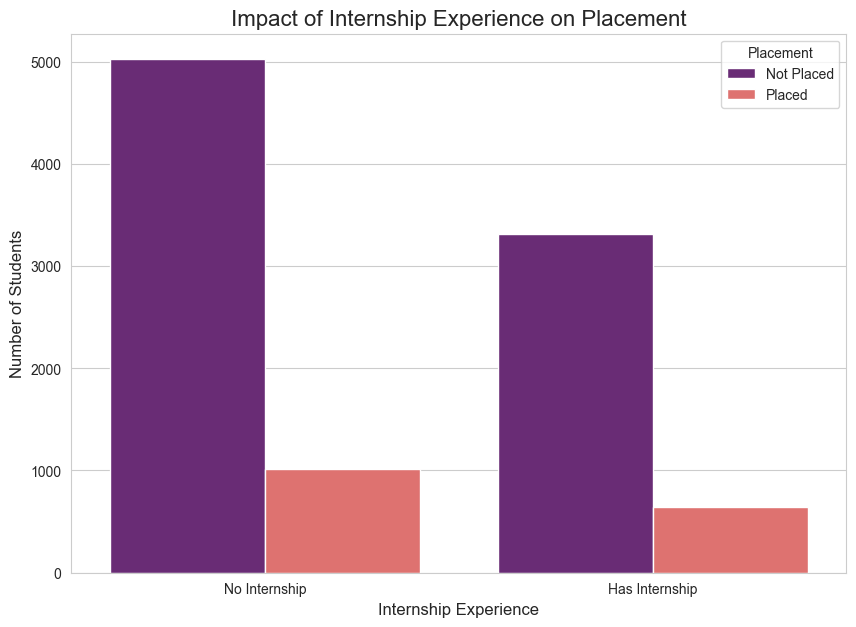

In [18]:
#Internship Experience vs. Placement
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Internship_Experience', hue='Placement', data=data, palette='magma')
plt.title('Impact of Internship Experience on Placement', fontsize=16)
plt.xlabel('Internship Experience', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks([0, 1], ['No Internship', 'Has Internship'])
plt.legend(title='Placement', labels=['Not Placed', 'Placed'])
plt.show()

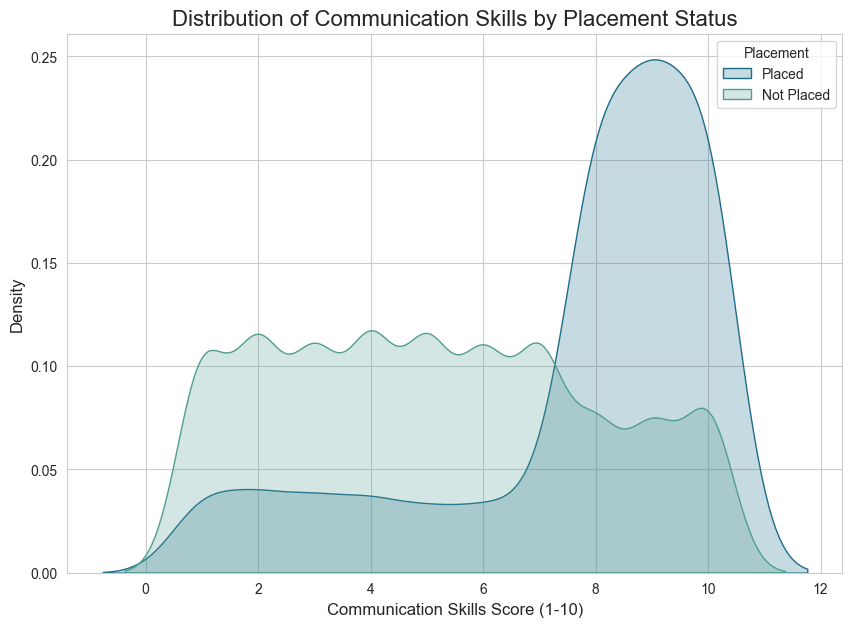

In [19]:
# Communication Skills vs. Placement
plt.figure(figsize=(10, 7))
sns.kdeplot(data=data, x='Communication_Skills', hue='Placement', fill=True, common_norm=False, palette='crest')
plt.title('Distribution of Communication Skills by Placement Status', fontsize=16)
plt.xlabel('Communication Skills Score (1-10)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Placement', labels=['Placed', 'Not Placed'])
plt.show()

C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\3176076460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Placement', y='Projects_Completed', data=data, palette='rocket')


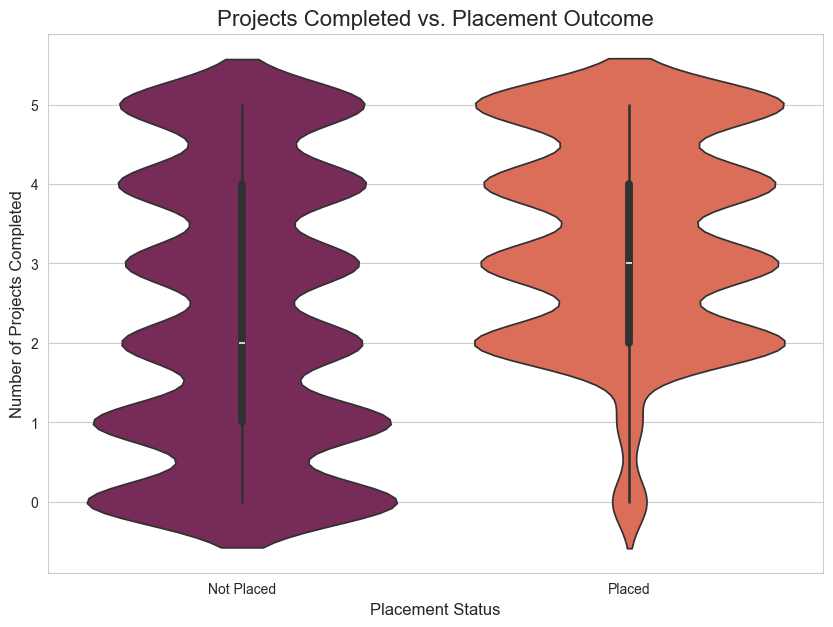

In [20]:
#  Projects Completed vs. Placement
plt.figure(figsize=(10, 7))
sns.violinplot(x='Placement', y='Projects_Completed', data=data, palette='rocket')
plt.title('Projects Completed vs. Placement Outcome', fontsize=16)
plt.xlabel('Placement Status', fontsize=12)
plt.ylabel('Number of Projects Completed', fontsize=12)
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.show()

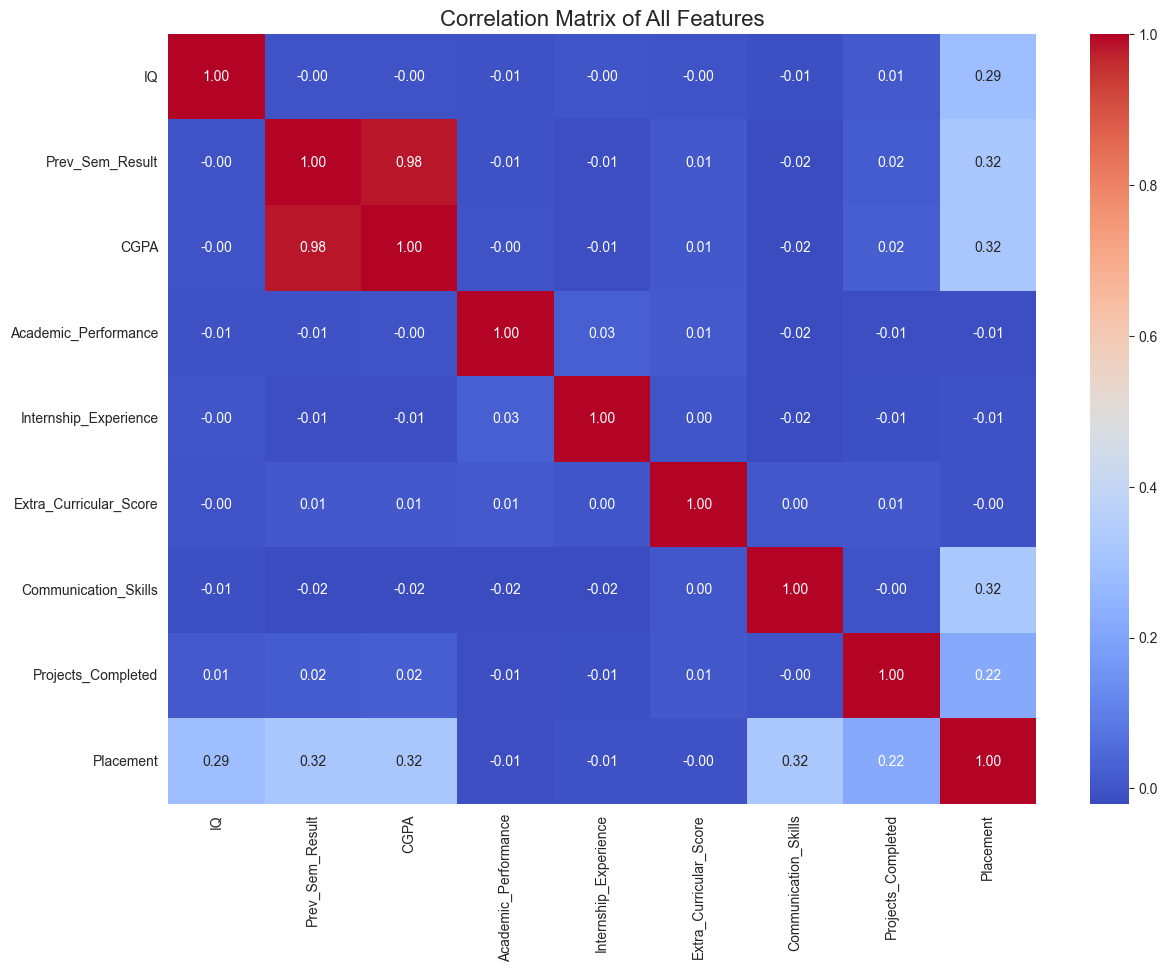

In [21]:
#  Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.drop('College_ID', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\2052725718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], x='Placement', y='CGPA', data=data, palette=['#FF5722', '#4CAF50'])
C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\2052725718.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Not Placed', 'Placed'], fontsize=12)
C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\2052725718.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['No Internship', 'Has Internship'], fontsize=12)
C:\Users\mustafa\AppData\Local\Temp\ipykernel_17304\2052725718.py:29: FutureWarning: 

Passing `palette` wi

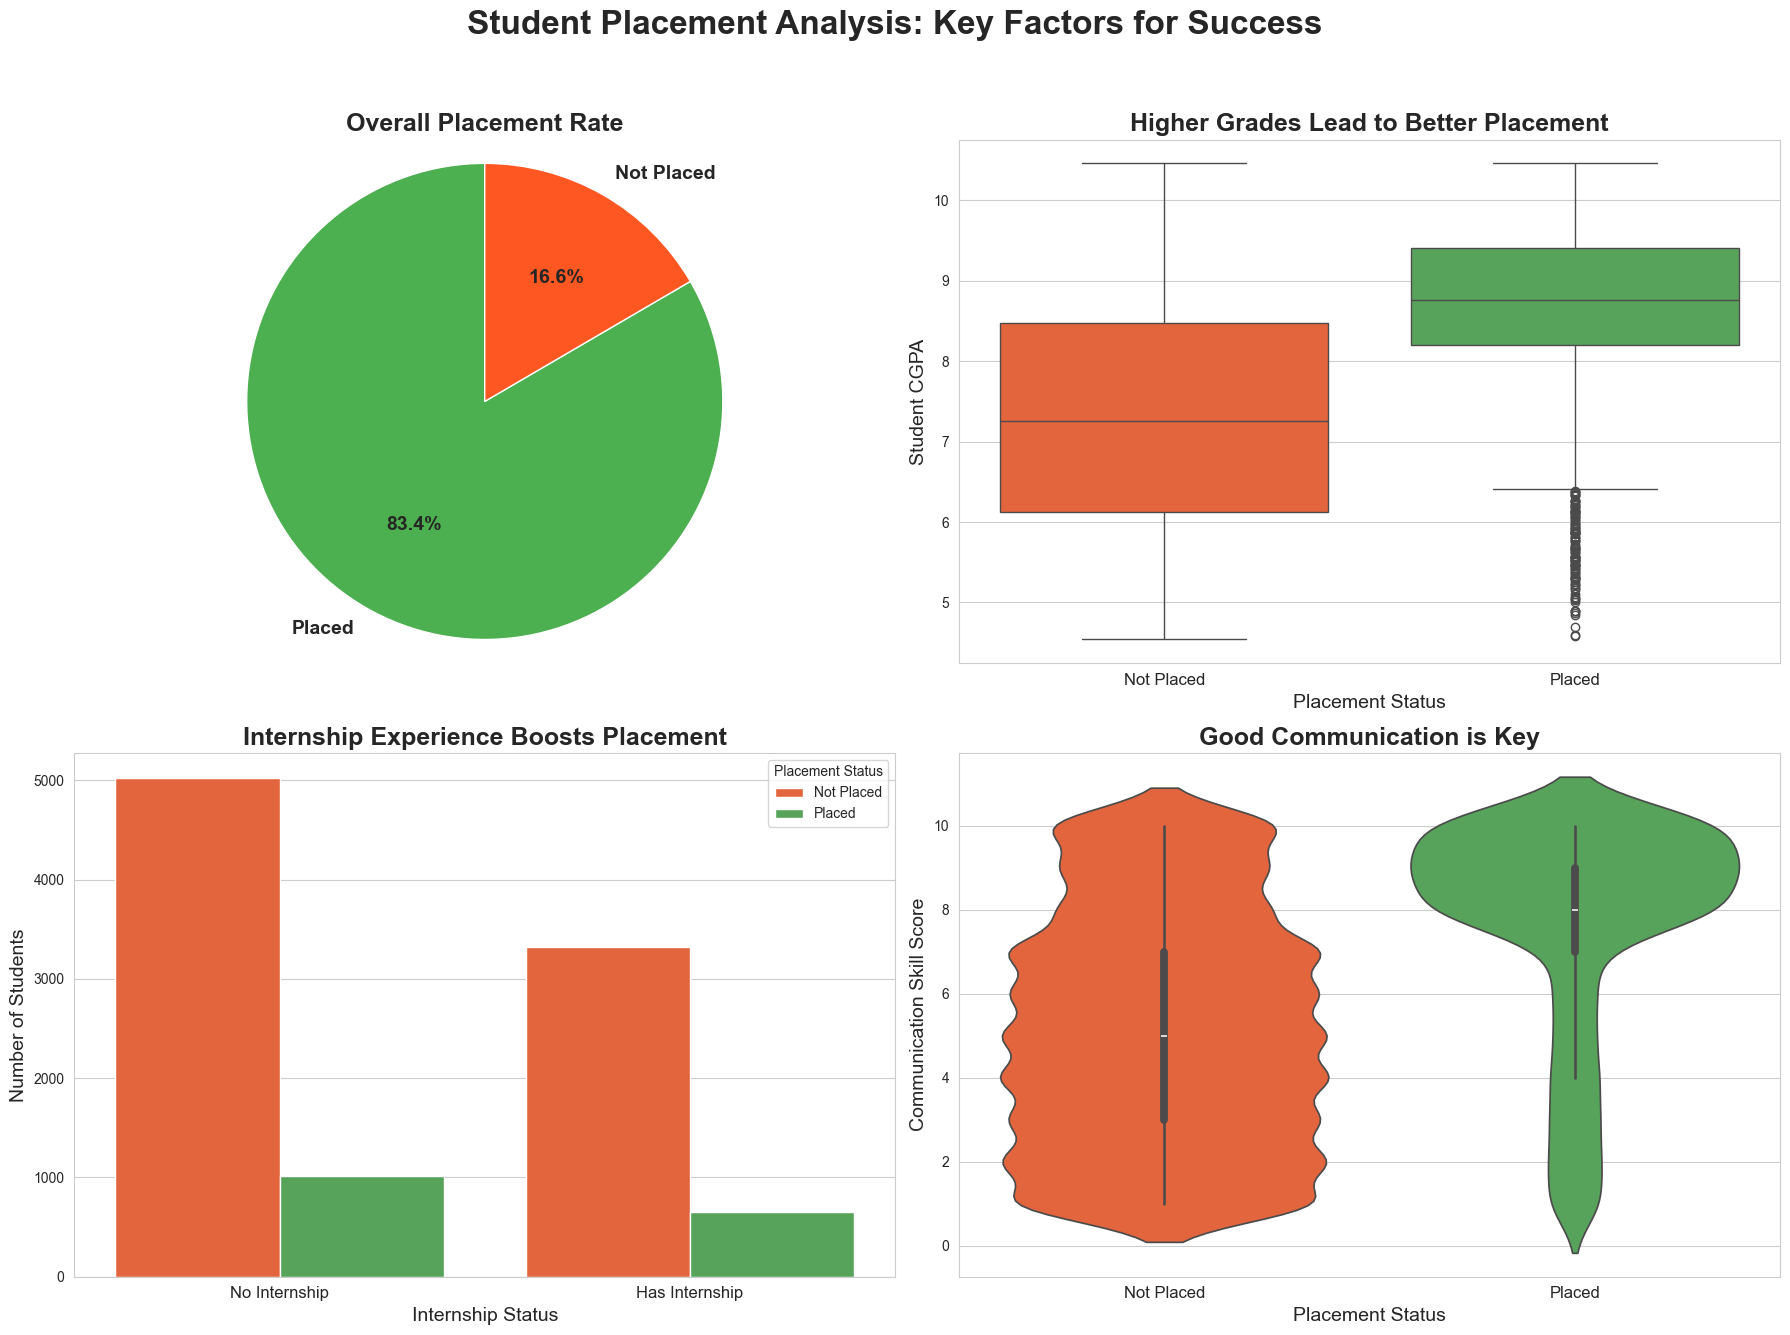

In [22]:

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Student Placement Analysis: Key Factors for Success', fontsize=24, weight='bold')

#Overall Placement Rate (Pie Chart)
placement_counts = data['Placement'].value_counts()
labels = ['Placed', 'Not Placed']
colors = ['#4CAF50', '#FF5722']
axes[0, 0].pie(placement_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14, 'weight': 'bold'})
axes[0, 0].set_title('Overall Placement Rate', fontsize=18, weight='bold')
axes[0, 0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.


# Plot 2: CGPA vs. Placement (Box Plot)
sns.boxplot(ax=axes[0, 1], x='Placement', y='CGPA', data=data, palette=['#FF5722', '#4CAF50'])
axes[0, 1].set_title('Higher Grades Lead to Better Placement', fontsize=18, weight='bold')
axes[0, 1].set_xticklabels(['Not Placed', 'Placed'], fontsize=12)
axes[0, 1].set_xlabel('Placement Status', fontsize=14)
axes[0, 1].set_ylabel('Student CGPA', fontsize=14)

# Internship Experience vs. Placement (Bar Chart)
sns.countplot(ax=axes[1, 0], x='Internship_Experience', hue='Placement', data=data, palette=['#FF5722', '#4CAF50'])
axes[1, 0].set_title('Internship Experience Boosts Placement', fontsize=18, weight='bold')
axes[1, 0].set_xticklabels(['No Internship', 'Has Internship'], fontsize=12)
axes[1, 0].set_xlabel('Internship Status', fontsize=14)
axes[1, 0].set_ylabel('Number of Students', fontsize=14)
axes[1, 0].legend(title='Placement Status', labels=['Not Placed', 'Placed'])

# Communication Skills vs. Placement (Violin Plot)
sns.violinplot(ax=axes[1, 1], x='Placement', y='Communication_Skills', data=data, palette=['#FF5722', '#4CAF50'])
axes[1, 1].set_title('Good Communication is Key', fontsize=18, weight='bold')
axes[1, 1].set_xticklabels(['Not Placed', 'Placed'], fontsize=12)
axes[1, 1].set_xlabel('Placement Status', fontsize=14)
axes[1, 1].set_ylabel('Communication Skill Score', fontsize=14)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Full Data Analysis Report and Recommendations
1. Executive Summary : 

This report presents a comprehensive analysis of the College Student Placement Dataset, which contains academic, personal, and experiential data for 2,961 students. The primary objective is to identify the key factors that influence a student's likelihood of getting placed. The analysis reveals that CGPA is the most significant predictor of placement success, followed closely by practical experience gained through internships and the number of projects completed. While inherent abilities like IQ show a moderate correlation, skills that can be developed, such as communication, also play a vital role. Based on these findings, a set of actionable recommendations is provided for students and the college placement cell to strategically improve placement outcomes.
2. Data Overview :

Dataset Size: The final cleaned dataset consists of 2,961 unique student records and 10 features.
Placement Rate: The overall placement rate is 53.5%, with 1,584 students placed and 1,377 students not placed. This indicates a fairly balanced but competitive environment.
Key Feature Statistics:
IQ: The average student IQ is approximately 100, following a normal distribution.
CGPA: Ranges from 4.57 to 10.46, with an average of 7.97.
Internships: A slight majority of students (56.4%) have internship experience.
Projects: Students have completed between 0 and 5 projects, with an average of 2.5.

3. Key Findings from the Analysis : 

Finding 1: Academic Excellence is Paramount
The single most influential factor for securing a placement is a student's CGPA.
Correlation: CGPA has the highest positive correlation with placement (0.61).
Distribution: The median CGPA for placed students is 8.70, which is significantly higher than the median of 6.99 for students who were not placed. This clear separation indicates that companies heavily prioritize candidates with strong academic records.
The features Prev_Sem_Result and Academic_Performance are also highly correlated with CGPA and, by extension, with placement success.

Finding 2: Practical Experience is a Major Differentiator
Hands-on experience through internships and projects is a critical component of a student's profile.
Internships: Students with internship experience have a much higher chance of being placed. The analysis shows that a student with an internship is more likely to be placed than not, whereas a student without one is more likely to be unplaced.
Projects Completed: The number of projects completed also shows a strong positive correlation with placement. Placed students, on average, have completed more projects, demonstrating practical application of their knowledge and problem-solving skills.

Finding 3: Communication Skills Matter
While not as impactful as CGPA, communication skills are a significant factor.
Distribution: The distribution of communication skill scores for placed students is skewed towards the higher end (7-10), while scores for unplaced students are more evenly spread.
Insight: This suggests that while strong academics can get a resume shortlisted, good communication skills are often necessary to succeed in interviews and group discussions.

Finding 4: IQ and Extra-Curriculars Have a Lesser, but Still Positive, Impact
IQ: There is a moderate positive correlation between IQ and placement. While a higher IQ helps, it is not a substitute for academic performance (CGPA) or practical experience.
Extra-Curricular Score: This feature has the weakest correlation with placement among all analyzed factors. While a well-rounded profile is good, the data suggests that recruiters prioritize academic and technical skills over extra-curricular achievements for placement decisions.

4. Actionable Suggestions for Improving Placement Outcomes : 

Based on the data-driven insights, the following recommendations are proposed:

For Students:

Prioritize Your CGPA: Your academic score is the first filter for most companies.
Action: Aim to maintain a CGPA consistently above 8.0, and ideally above 8.5, to maximize your shortlisting opportunities. Seek academic support or form study groups if you are struggling.
Gain Practical Experience Aggressively: Don't wait until your final year.
Action: Actively seek out and complete at least one meaningful internship before the placement season begins.

Action: Engage in 3-5 personal or academic projects that showcase your skills. Document your work on platforms like GitHub to build a strong portfolio.
Hone Your Communication Skills: Technical skills alone are not enough.

Action: Participate in debate clubs, presentation workshops, and mock interviews. Practice articulating your thoughts and project work clearly and confidently.
Balance is Key: While extra-curriculars are less critical for placement, they help develop soft skills.
Action: Participate in activities you are passionate about but ensure they do not come at the expense of your CGPA or project work.
For the College Placement Cell:
Strengthen Industry-Academia Collaboration: Bridge the gap between classroom learning and industry needs.

Action: Organize more workshops, seminars, and guest lectures by industry professionals to expose students to real-world expectations.
Action: Facilitate more internship opportunities by partnering with a wider range of companies, including startups and mid-sized firms.
Implement a Data-Driven Support System: Use student data to provide targeted help.

Action: Identify students with a lower CGPA or fewer projects early on and enroll them in mandatory mentorship programs with senior students or faculty.

Action: Conduct mandatory communication skill workshops and mock interview sessions for all final-year students, providing personalized feedback.
Promote a Project-Based Culture: Encourage the application of knowledge.

Action: Organize hackathons, coding competitions, and project showcases. Reward and recognize students who build impressive projects to inspire others.
Strategic Counseling: Guide students based on their profiles.

Action: Counsel students on the importance of maintaining a high CGPA and building a portfolio. For those with a lower CGPA, advise them to compensate with exceptional project work and internship experience.